In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Fetching the dataframe and labelling the data for use
file = 'Maths_Grading_model/MathE dataset (4).csv'
df = pd.read_csv(file,sep = ',',header = 0,on_bad_lines='skip')
columns = ['Student ID','Question ID','Type of Answer','Student Country','Question Level','Topic','Subtopic','Keywords']
for column in columns:
    df[column] = LabelEncoder().fit_transform(df[column])

In [22]:
#Setting up data to Train and Test
X = df.values[:,0:8]
X = np.delete(X,3,axis = 1)
Y = df.values[:,3]
Y = LabelEncoder().fit_transform(Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=100)

In [23]:
#Setting up the Decision Tree Model
entropy = DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=21,min_samples_leaf=20)
entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=20,
                       random_state=100)

In [24]:
#Setting up the Logistic Tree Model
LR_model = LogisticRegression(penalty='l2',C=0.1)
LR_model.fit(X_train,Y_train)

C:\Users\ST\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [25]:
#Predicting Models
y_pred = entropy.predict(X_test)
lr_pred = LR_model.predict(X_test)

In [32]:
a_entropy = accuracy_score(Y_test, y_pred) * 100
f1_entropy = f1_score(Y_test, y_pred)

# Cross-validation for Decision Tree
cross_entropy = cross_val_score(entropy, X, Y, cv=5, scoring='accuracy')
mean_cv_entropy = np.mean(cross_entropy)*100

# Metrics for Logistic Regression
a_LR = accuracy_score(Y_test,lr_pred) * 100
f1_LR = f1_score(Y_test,lr_pred)

# Cross-validation for Logistic Regression
cross_LR = cross_val_score(LR_model, X_train, Y_train, cv=5, scoring='accuracy')
mean_cv_LR = np.mean(cross_LR)*100

C:\Users\ST\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ST\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [33]:
print('The Accuracy Score for Decision Tree Model :', a_entropy)
print('The Accuracy Score for Logistic Regression Model :', a_LR)

The Accuracy Score for Decision Tree Model : 62.01117318435754
The Accuracy Score for Logistic Regression Model : 56.35474860335196


In [34]:
print('The f1 score for Decision Tree Model:', f1_entropy)
print('The f1 score for Logistic Regression Model:', f1_LR)

The f1 score for Decision Tree Model: 0.5891238670694864
The f1 score for Logistic Regression Model: 0.4131455399061033


In [35]:
print('The Cross Value score for accuracy for Decision Tree Model :', mean_cv_entropy)
print('The Cross Value score for accuracy for Logistic Regression Model:', mean_cv_LR)

The Cross Value score for accuracy for Decision Tree Model : 57.97179521637654
The Cross Value score for accuracy for Logistic Regression Model: 56.07592917167141


C:\Users\ST\AppData\Local\Temp\ipykernel_17508\743357471.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
C:\Users\ST\AppData\Local\Temp\ipykernel_17508\743357471.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=ax[1], palette='viridis')
C:\Users\ST\AppData\Local\Temp\ipykernel_17508\743357471.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Cross-Val Score', data=metrics_df, ax=ax[2], palette='viridis

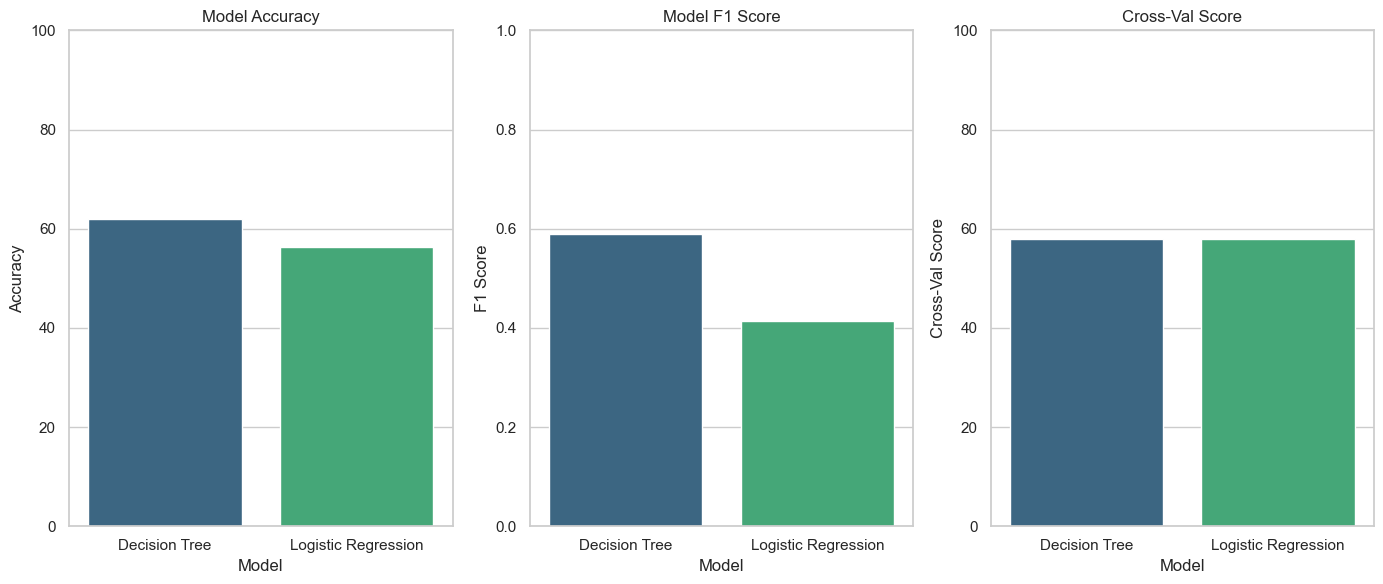

In [36]:
model_names = ['Decision Tree', 'Logistic Regression']
accuracy_scores = [a_entropy, a_LR]
f1_scores = [f1_entropy, f1_LR]
cross_val = [mean_cv_entropy,mean_cv_entropy]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Cross-Val Score' : cross_val
})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Bar plot for accuracy scores
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
ax[0].set_title('Model Accuracy')
ax[0].set_ylim(0, 100)  # Set y-axis limit from 0 to 100 (for accuracy)

# Bar plot for F1 scores
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=ax[1], palette='viridis')
ax[1].set_title('Model F1 Score')
ax[1].set_ylim(0, 1)  # Set y-axis limit from 0 to 1 (for F1 Score)

sns.barplot(x='Model', y='Cross-Val Score', data=metrics_df, ax=ax[2], palette='viridis')
ax[2].set_title('Cross-Val Score')
ax[2].set_ylim(0, 100)

# Show the plots
plt.tight_layout()
plt.show()